In [1]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn.metrics import silhouette_score

C:\Users\theam\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\theam\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
wine = pd.read_csv("C:\\ExcelR\\Data Science Assignments\\8-PCA\\wine.csv")
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
# Considering only numerical data 
wine_data = wine.iloc[:,1:]
wine_data.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
# Converting into numpy array
wine_arr = wine_data.values
wine_arr

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [5]:
wine_normal_scale = scale(wine_arr)

In [6]:
wine_normal_scale

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [7]:
pca = PCA(n_components = 10)
pca_values = pca.fit_transform(wine_normal_scale)
pca_values 

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
         6.51390947e-02,  6.41442706e-01,  1.02095585e+00],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
         1.02441595e+00, -3.08846753e-01,  1.59701372e-01],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -3.44216131e-01, -1.17783447e+00,  1.13360857e-01],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         4.70238043e-02,  1.22214687e-03, -2.47997312e-01],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         3.90828774e-01,  5.74476725e-02,  4.91489502e-01],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.92913734e-01,  7.41660423e-01, -1.17969019e-01]])

In [8]:
#loadings or weights
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

In [9]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019])

In [10]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([36.2 , 55.41, 66.53, 73.6 , 80.16, 85.1 , 89.34, 92.02, 94.24,
       96.17])

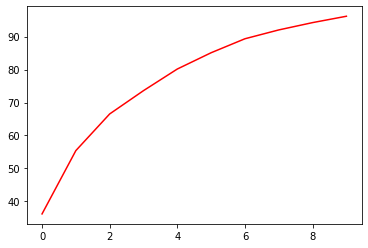

In [11]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="red")

In [13]:
 pca_values[:,0:2]

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ],
       [ 3.75706561, -2.75637191],
       [ 1.00890849, -0.86983082],
       [ 3.05025392, -2.12240111],
       [ 2.44908967, -1.17485013],
       [ 2.05943687, -1.60896307],
       [ 2.5108743 , -0.91807096],
       [ 2.75362819, -0.78943767],
       [ 3.47973668, -1.30233324],
       [ 1.7547529 , -0.61197723],
       [ 2.11346234, -0.67570634],
       [ 3.45815682, -1.13062988],
       [ 4.31278391, -2.09597558],
       [ 2.3051882 , -1.66255173],
       [ 2.17195527, -2.32730534],
       [ 1.89897118, -1.63136888],
       [ 3.54198508, -2.51834367],
       [ 2.0845222 , -1.06113799],
       [ 3.12440254, -0.78689711],
       [ 1.08657007, -0.24174355],
       [ 2.53522408,  0.09184062],
       [ 1.64498834,  0.51627893],
       [ 1.76157587,  0.31714893],
       [ 0.9900791 , -0.94066734],
       [ 1.77527763, -0.68617513],
       [ 1.23542396,  0.08980704],
       [ 2.18840633,

In [14]:
WinefinalDf = pd.concat([pd.DataFrame(pca_values[:,0:2],columns=['pc1','pc2']), wine[['Alcohol']]], axis = 1)
WinefinalDf

,pc1,pc2,Alcohol
0,3.316751,-1.443463,14.23
1,2.209465,0.333393,13.20
2,2.516740,-1.031151,13.16
3,3.757066,-2.756372,14.37
4,1.008908,-0.869831,13.24
...,...,...,...
173,-3.370524,-2.216289,13.71
174,-2.601956,-1.757229,13.40
175,-2.677839,-2.760899,13.27
176,-2.387017,-2.297347,13.17


In [15]:
plt.style.use('classic')

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

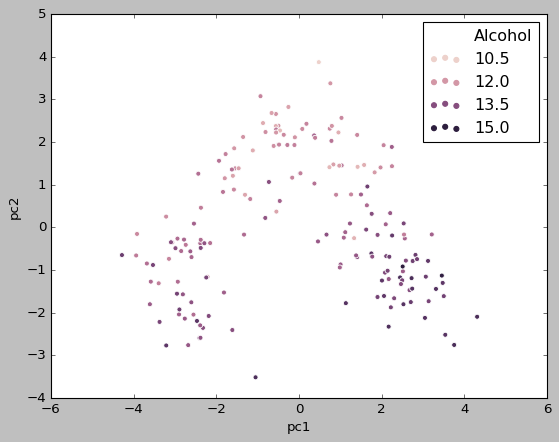

In [20]:
import seaborn as sns
sns.scatterplot(data=WinefinalDf,x='pc1',y='pc2',hue='Alcohol')  

In [18]:
#Hierarchical Clustering

In [19]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
data = pd.DataFrame(trans.fit_transform(wine.iloc[:,1:]))
data 

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


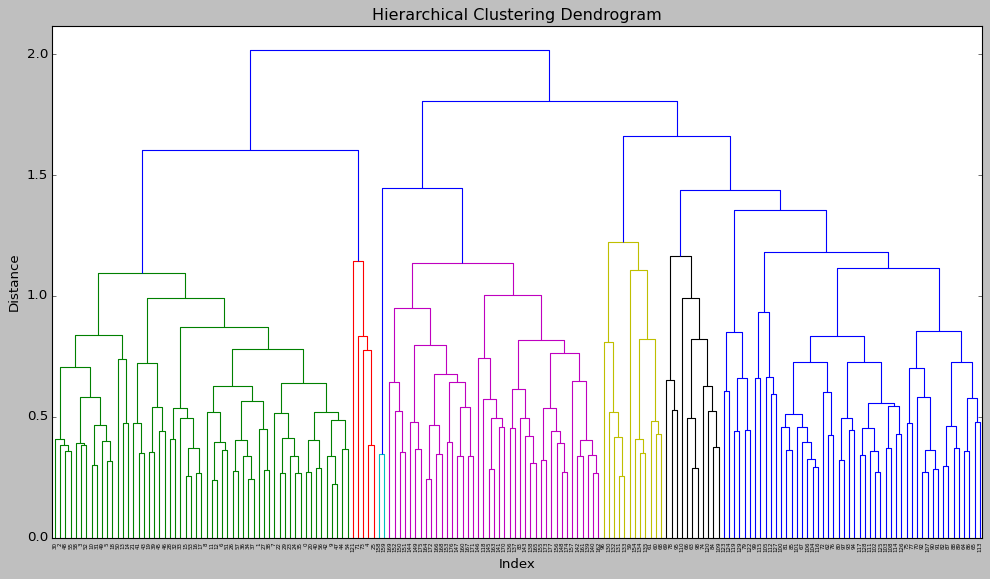

In [22]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch  
wine_com = linkage(data, method="complete",metric="euclidean")
plt.figure(figsize=(15, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(wine_com)
plt.show()

In [23]:
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=10, linkage='complete',affinity = "euclidean").fit(data) 
cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
wine['clust']=cluster_labels # creating a  new column and assigning it to new column 
wine

C:\Users\theam\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clust
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,4
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,4
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,4
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,4
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


In [24]:
wine.iloc[:,1:].groupby(wine.clust).mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clust
clust,,,,,,,,,,,,,,
0,12.107273,1.489091,2.152727,18.327273,108.545455,2.786364,2.551818,0.245455,2.412727,3.469091,1.015455,2.954545,660.000000,0
1,13.181463,3.628537,2.436829,21.451220,98.365854,1.651220,0.764878,0.459024,1.117073,7.271219,0.687073,1.736585,622.853659,1
2,12.940000,1.974000,2.918000,25.900000,117.200000,2.972000,3.240000,0.350000,1.888000,4.126000,1.154000,3.296000,685.000000,2
3,12.624286,1.332857,2.081429,16.628571,97.285714,1.954286,0.884286,0.535714,0.780000,4.898571,0.908571,1.664286,626.428571,3
4,13.765789,1.999825,2.434912,16.828070,105.824561,2.844561,2.992807,0.285088,1.900351,5.583684,1.061228,3.161053,1127.403509,4
5,13.910000,1.675000,2.670000,23.750000,93.500000,2.700000,1.205000,0.525000,2.495000,12.375000,0.570000,1.870000,640.000000,5
6,12.269744,1.632821,2.198205,20.215385,89.256410,2.086154,1.938974,0.361282,1.455897,2.968974,1.075282,2.793846,485.128205,6
7,12.346667,4.356667,2.338333,22.166667,89.666667,2.435000,2.291667,0.360000,1.966667,2.321667,0.885000,3.101667,455.333333,7
8,12.612000,2.464000,2.444000,21.000000,112.800000,1.452000,1.150000,0.206000,1.000000,4.540000,0.778000,1.524000,589.000000,8


In [25]:
#KMeans Clustering

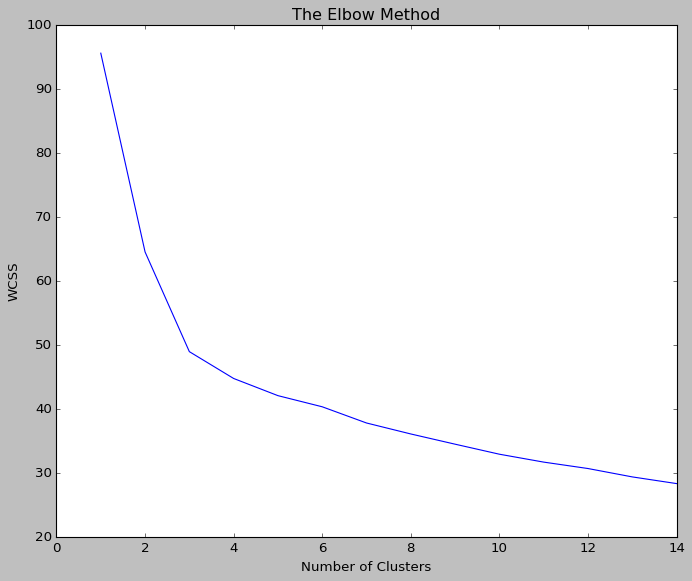

In [26]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 15):
    clf = KMeans(n_clusters=i)
    clf.fit(data)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 15), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

In [27]:
clf = KMeans(n_clusters=10)
y_kmeans = clf.fit_predict(data)

In [28]:
y_kmeans

array([4, 4, 4, 4, 0, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0,
       0, 0, 0, 0, 0, 4, 0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 7, 0, 4, 0, 4, 2,
       0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 7, 6, 7,
       7, 7, 5, 9, 5, 0, 7, 0, 7, 5, 7, 5, 9, 2, 7, 7, 6, 1, 7, 7, 6, 6,
       6, 6, 6, 6, 5, 2, 7, 9, 8, 7, 7, 2, 7, 7, 2, 7, 7, 6, 7, 6, 7, 2,
       2, 7, 6, 6, 6, 6, 7, 7, 1, 2, 2, 2, 2, 2, 2, 2, 2, 6, 6, 2, 8, 8,
       8, 8, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 3, 8, 8, 8, 8, 3,
       3, 1, 3, 1, 3, 3, 1, 1, 1, 1, 3, 1, 3, 3, 3, 8, 1, 3, 3, 1, 3, 3,
       3, 3])

In [29]:
#clf.cluster_centers_
clf.labels_

array([4, 4, 4, 4, 0, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0,
       0, 0, 0, 0, 0, 4, 0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 7, 0, 4, 0, 4, 2,
       0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 7, 6, 7,
       7, 7, 5, 9, 5, 0, 7, 0, 7, 5, 7, 5, 9, 2, 7, 7, 6, 1, 7, 7, 6, 6,
       6, 6, 6, 6, 5, 2, 7, 9, 8, 7, 7, 2, 7, 7, 2, 7, 7, 6, 7, 6, 7, 2,
       2, 7, 6, 6, 6, 6, 7, 7, 1, 2, 2, 2, 2, 2, 2, 2, 2, 6, 6, 2, 8, 8,
       8, 8, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 3, 8, 8, 8, 8, 3,
       3, 1, 3, 1, 3, 3, 1, 1, 1, 1, 3, 1, 3, 3, 3, 8, 1, 3, 3, 1, 3, 3,
       3, 3])

In [ ]:
md=pd.Series(y_kmeans)  # converting numpy array into pandas series object 
wine['clust']=md # creating a  new column and assigning it to new column 
wine

In [30]:
wine['clust']=cluster_labels # creating a  new column and assigning it to new column 
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clust
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,4
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,4
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,4
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,4
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


In [31]:
wine.iloc[:,1:15].groupby(wine.clust).mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clust
clust,,,,,,,,,,,,,,
0,12.107273,1.489091,2.152727,18.327273,108.545455,2.786364,2.551818,0.245455,2.412727,3.469091,1.015455,2.954545,660.000000,0
1,13.181463,3.628537,2.436829,21.451220,98.365854,1.651220,0.764878,0.459024,1.117073,7.271219,0.687073,1.736585,622.853659,1
2,12.940000,1.974000,2.918000,25.900000,117.200000,2.972000,3.240000,0.350000,1.888000,4.126000,1.154000,3.296000,685.000000,2
3,12.624286,1.332857,2.081429,16.628571,97.285714,1.954286,0.884286,0.535714,0.780000,4.898571,0.908571,1.664286,626.428571,3
4,13.765789,1.999825,2.434912,16.828070,105.824561,2.844561,2.992807,0.285088,1.900351,5.583684,1.061228,3.161053,1127.403509,4
5,13.910000,1.675000,2.670000,23.750000,93.500000,2.700000,1.205000,0.525000,2.495000,12.375000,0.570000,1.870000,640.000000,5
6,12.269744,1.632821,2.198205,20.215385,89.256410,2.086154,1.938974,0.361282,1.455897,2.968974,1.075282,2.793846,485.128205,6
7,12.346667,4.356667,2.338333,22.166667,89.666667,2.435000,2.291667,0.360000,1.966667,2.321667,0.885000,3.101667,455.333333,7
8,12.612000,2.464000,2.444000,21.000000,112.800000,1.452000,1.150000,0.206000,1.000000,4.540000,0.778000,1.524000,589.000000,8
